<a href="https://colab.research.google.com/github/FoozBarakat/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales 💼📊

- Authors ✍️: Qamar and Fooz

## Project Overview ✨

Welcome to our portfolio project! This project is designed to demonstrate our data science skills through the exploration and analysis of a sales dataset. You’ll find a step-by-step breakdown of the entire process, from loading and cleaning the data to performing in-depth analysis. Let’s dive in!
For now, let's start with an overview of the dataset:
___

### 📋 Feature Dictionary

| Feature | Description | Example |
|---------|-------------|---------|
| Item_Identifier | Unique product ID 🛒 | FDA15|
| Item_Weight | Weight of the product in kilograms ⚖️ | 9.30 |
| Item_Fat_Content | Whether the product is Low Fat or Regular 🥛 | Low Fat|
| Item_Visibility | The percentage of the product’s visibility in the store 📊| 0.016047 |
| Item_Type | The category of the product (e.g., Dairy, Soft Drinks, Household) 🍞 | Dairy |
| Item_MRP | Maximum Retail Price (MRP) of the product in local currency 💰 | 249.8092 |
| Outlet_Identifier | Unique store ID 🏬 | OUT049 |
| Outlet_Establishment_Year | The year the store was established 🗓️ | 1999 |
| Outlet_Size | Size of the store (Small, Medium, High) 🏠 | Medium |
| Outlet_Location_Type | The location type of the store (Tier 1, Tier 2, Tier 3) | Tier 1 |
| Outlet_Type | Type of store (e.g., Grocery Store, Supermarket Type1) 🛒 | Supermarket Type1 |
| Item_Outlet_Sales | Total sales of the product in that particular store (Target variable) 💸 | 3735.1380 |

___
What You’ll Find in This Colab Notebook 📑
- Load and Inspect Data: Loading the dataset and performing an initial inspection of the data. 🔍
- Clean Data: Handling missing values, correcting data types, and ensuring the dataset is ready for analysis. 🧼✨
- Exploratory Data Analysis (EDA): Visualizing and summarizing the data to uncover key patterns and trends. 📊🔍
- Feature Inspection: Examining the features and understanding their role in predicting the target variable. 🛠️👀
___
Let’s get started! 🚀

## Load and Inspect Data  🔍

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import numpy as np

In [188]:
# Qamar path
#fpath = '/content/drive/MyDrive/sales_predictions_2023.csv'

# Fooz path
fpath = '/content/drive/MyDrive/Colab Notebooks/Projects/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Q1) How many rows and columns?

In [189]:
df_sales.shape

(8523, 12)

## Q2) What are the datatypes of each variable?

In [190]:
# check the data type for each column
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data 🧼✨

## Q3) Are there duplicates? If so, drop any duplicates

In [191]:
# check if there is any duplicate
df_sales.duplicated().sum()

0

## Q4) Identify missing values.

In [192]:
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


## 5) Address the missing values by using a placeholder value.

In [193]:
df_sales['Item_Weight'].dtype

dtype('float64')

In [194]:
# check the summary statistics for the item_weight column
df_sales['Item_Weight'].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [195]:
# fill the missing values for the Item Weight column with the mean value
weight_mean = df_sales['Item_Weight'].mean()
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(weight_mean)

In [196]:
# make sure that there is no missing value for the Item_weight column
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [197]:
# check the data type of column Outlet_Size
df_sales['Outlet_Size'].dtype

dtype('O')

In [198]:
# check the values to determine the most repeated value
df_sales['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [199]:
df_sales['Outlet_Size'].head()

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High


In [200]:
# check the mode for the categorical coulmn
size_mode = mode(df_sales['Outlet_Size'])

In [201]:
# fill the empty values with the mode 'Medium'
original_outlet_size = df_sales['Outlet_Size'].isna()
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(size_mode)

## 6) Confirm that there are no missing values after addressing them.

In [202]:
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


## 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [203]:
# get the object columns names
str_cols = df_sales.select_dtypes("object").columns
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [204]:
# check the value count for each column
for col in str_cols:
  print(df_sales[col].value_counts())
  print('__________ \n')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
__________ 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
__________ 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
__________ 

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT0

In [205]:
# we need to fix the Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [206]:
# replace the 'LF' and 'low fat' with 'Low Fat'
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,2889
reg,117


In [207]:
# replace the 'rg' with 'Regular'
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [208]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis 📊🔍

In [209]:
num_cols= df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [210]:
# annotate histogram plot
def annotated_hist(df, col):
  # calculate the mean
  mean= df[col].mean().round(2)
  # calculate the median
  median= df[col].median().round(2)

  # plot by usin seaborn using histplot function
  fig, ax= plt.subplots(figsize= (10, 8))
  ax= sns.histplot(data= df, x= col)

  ax.axvline(mean, color= 'red', label= f'Mean is {mean}', lw= 2)
  ax.axvline(median, color= 'green', label= f'Median is {median}', lw= 2, ls= ':')

  ax.set_title(f'Distribution of {col}')
  ax.legend()

  return fig, ax

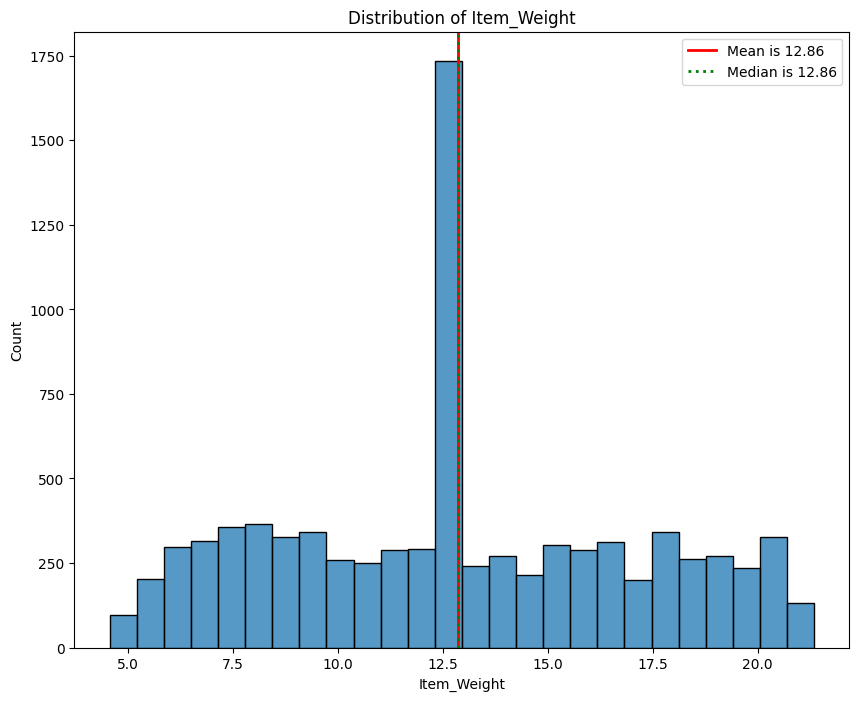

In [211]:
# histogram for Item_Weight feature
fig, ax= annotated_hist(df_sales, 'Item_Weight')

Technical Insights: `We can see that it is a symmetric shape, meaning that the mean is equal to the median.`

Business Insights: `We can see that most of the items weight is in the range of median, so we can set this weight as a default weight for handling shipping and inventory.`



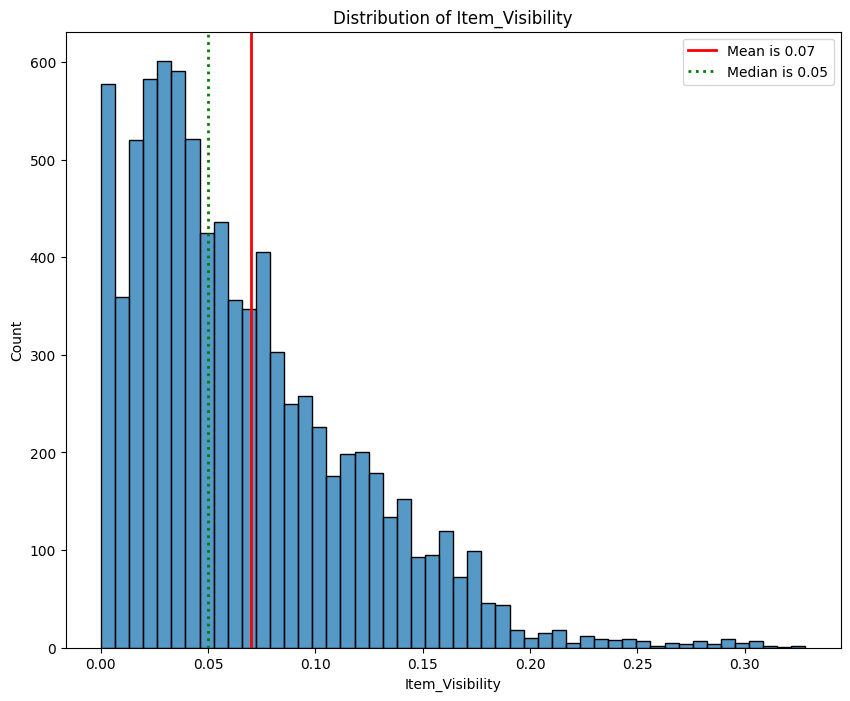

In [212]:
# histogram for Item_Visibility feature
fig, ax= annotated_hist(df_sales, 'Item_Visibility')

Technical Insights: `We can see that it is a right skewed meaning that the mean is bigger than the median.`

Business Insights: `It looks like the mean and median of item visibility are low, which suggests that improving visibility could improve sales, as items that are more visible to customers typically sell better.`

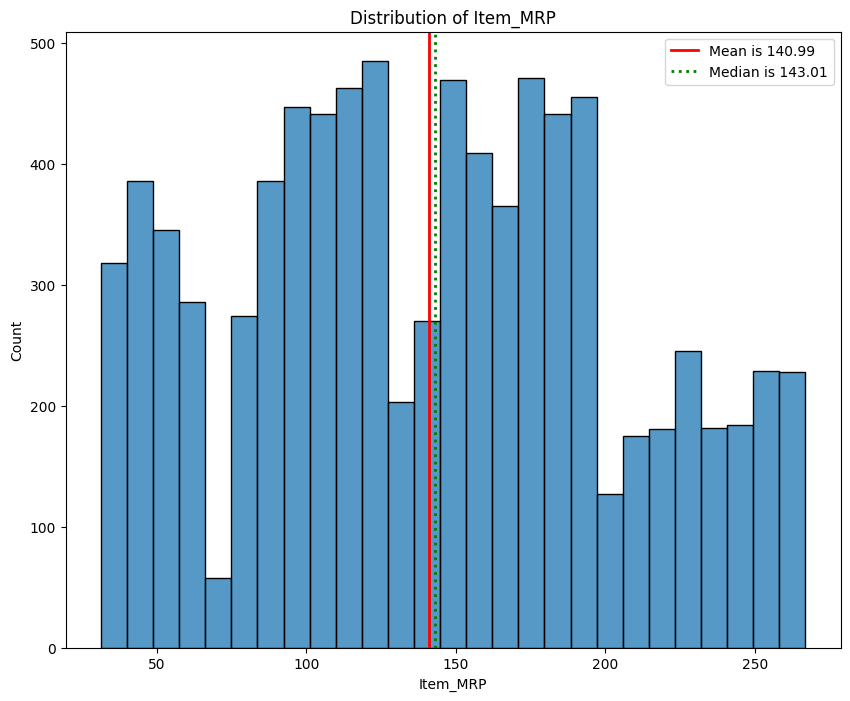

In [213]:
# histogram for Item_MRP feature
fig, ax= annotated_hist(df_sales, 'Item_MRP')

Technical Insights: `We can see that it is a left skewed meaning that the mean is smaller than the median.`

Business Insights: `Maybe this feature can help to do segmentation of the types of customers who are purchasing in the higher MRP and which of the customers are interested in the lower MRP, but we definitely can see that we can find patterns if we further investigate.`

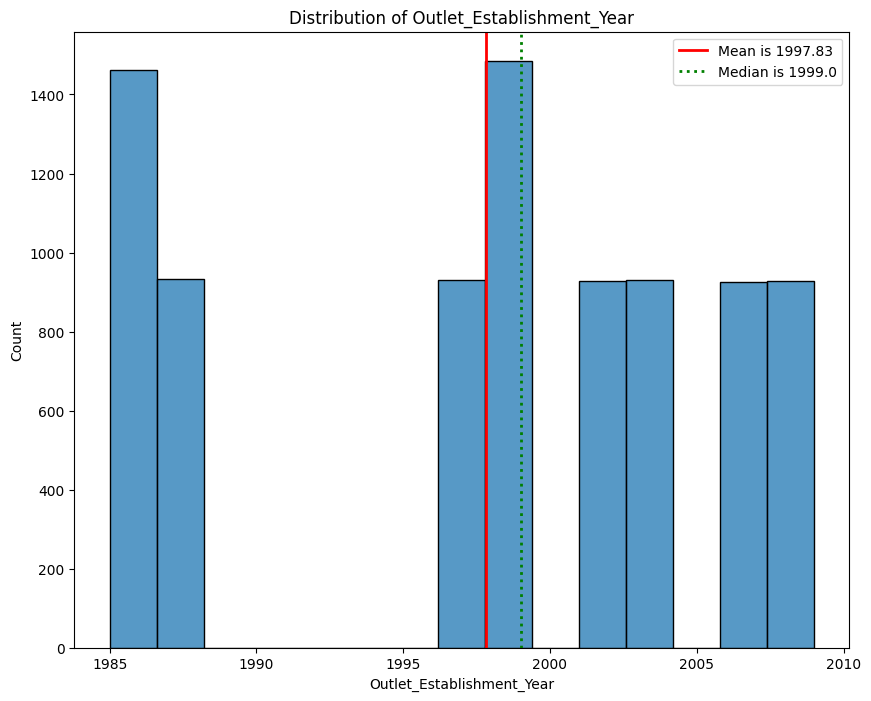

In [214]:
# histogram for Outlet_Establishment_Year feature
fig, ax= annotated_hist(df_sales, 'Outlet_Establishment_Year')

Technical Insights: `Even though the median is bigger than the mean, we cannot say that it is visibly showing that it is skewed.`

Business Insights: `This shows that there is variation in the number of outlets established over years, and the peak was before 2000.`

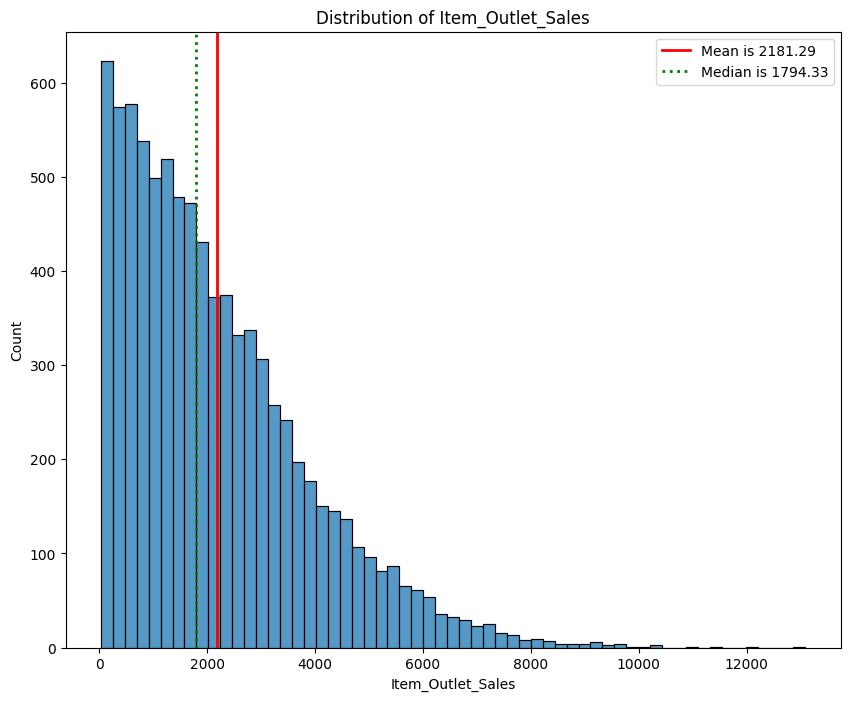

In [215]:
# histogram for Item_Outlet_Sales_Year feature
fig, ax= annotated_hist(df_sales, 'Item_Outlet_Sales')

Technical Insights: `We can see that it is a right skewed meaning that the mean is bigger than the median.`

Business Insights: `This shows that most of the sales count has a lower total; this can help to target the right customer.`

In [216]:
# box & boxen plot function
def boxen_plt(df,col):
  fig, ax = plt.subplots(figsize= (10,8), ncols= 2 )

  sns.boxplot(data= df, y= col, color= "red", ax= ax[0])
  sns.boxenplot(data= df, y= col, color= 'red', ax= ax[1])

  ax[0].set_title(f'Box plot')
  ax[1].set_title(f'Boxen plot')

  fig.suptitle(f'Box & Boxen Plots {col}')

  return fig, ax

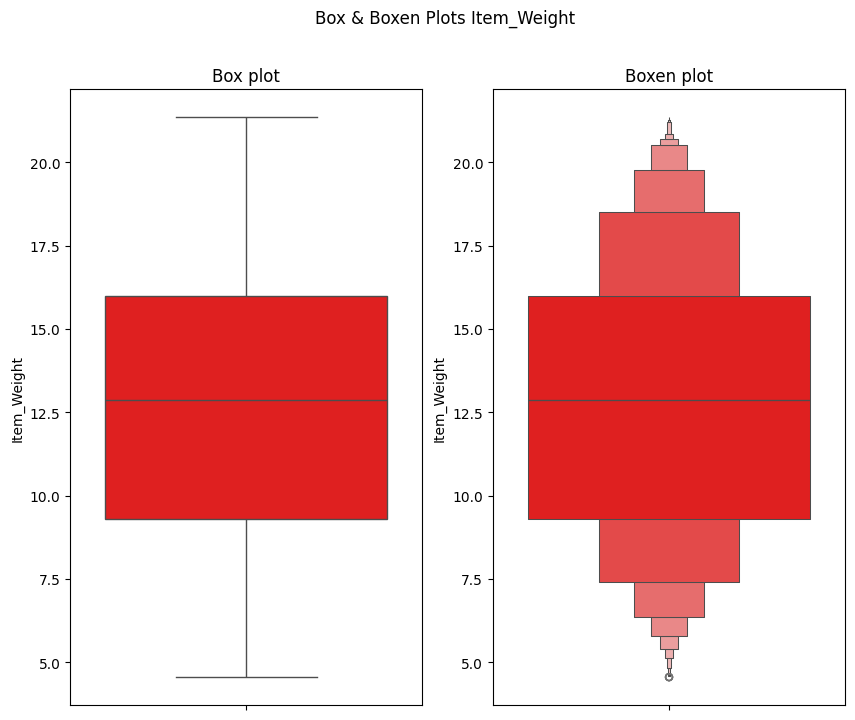

In [217]:
# box and boxen for Item_Weight feature
fig, ax = boxen_plt(df_sales,'Item_Weight' )

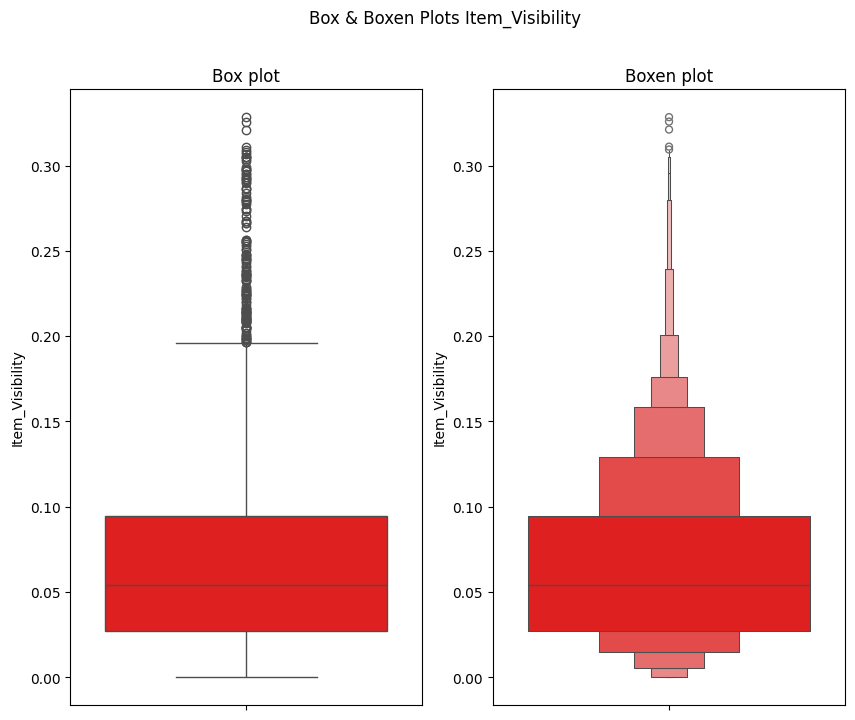

In [218]:
# box and boxen for Item_Visibility feature
fig, ax = boxen_plt(df_sales,'Item_Visibility' )

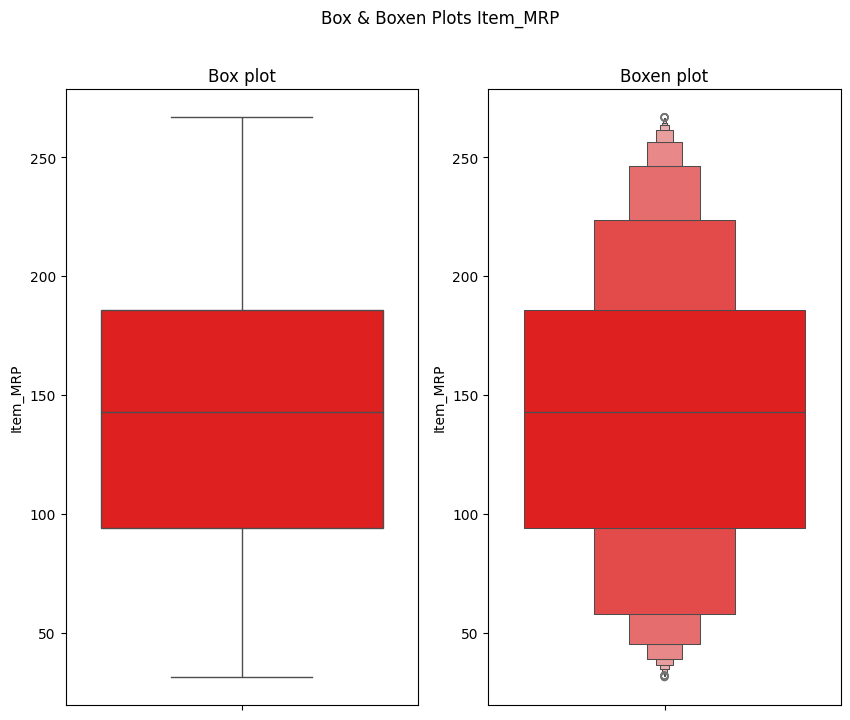

In [219]:
# box and boxen for Item_MRP feature
fig, ax = boxen_plt(df_sales,'Item_MRP' )

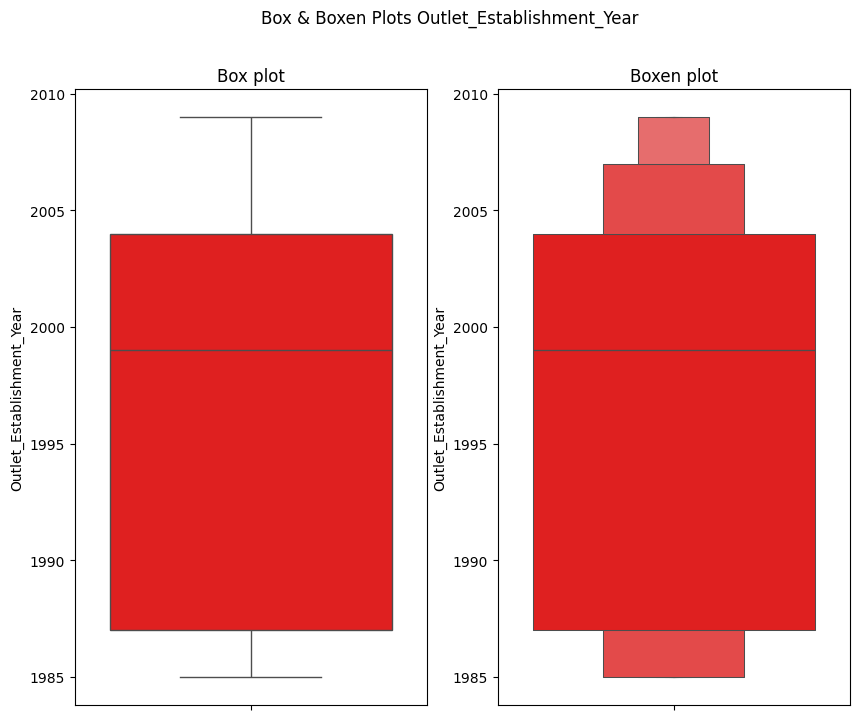

In [220]:
# box and boxen for Outlet_Establishment_Year feature
fig, ax = boxen_plt(df_sales,'Outlet_Establishment_Year' )

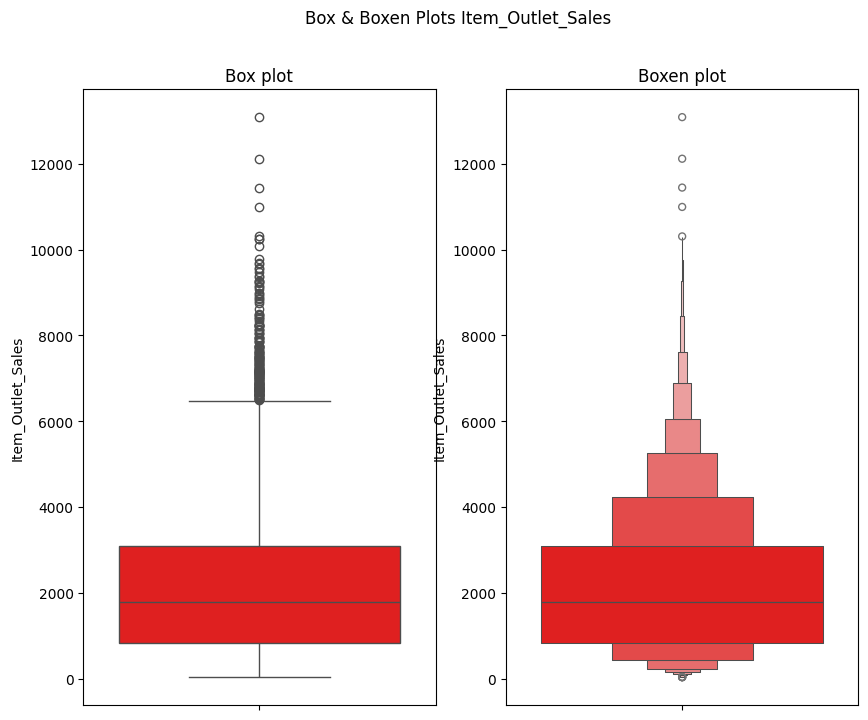

In [221]:
# box and boxen for Item_Outlet_Sales feature
fig, ax = boxen_plt(df_sales,'Item_Outlet_Sales' )

In [222]:
def count_plt(df,col):
  fig, ax = plt.subplots(figsize=(10,8))
  ax=sns.countplot(data=df,x=col, color = 'green')
  ax.set_title(f"plot of {col}")
  ax.tick_params(axis='x', rotation = 90)
  return fig, ax

In [223]:
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

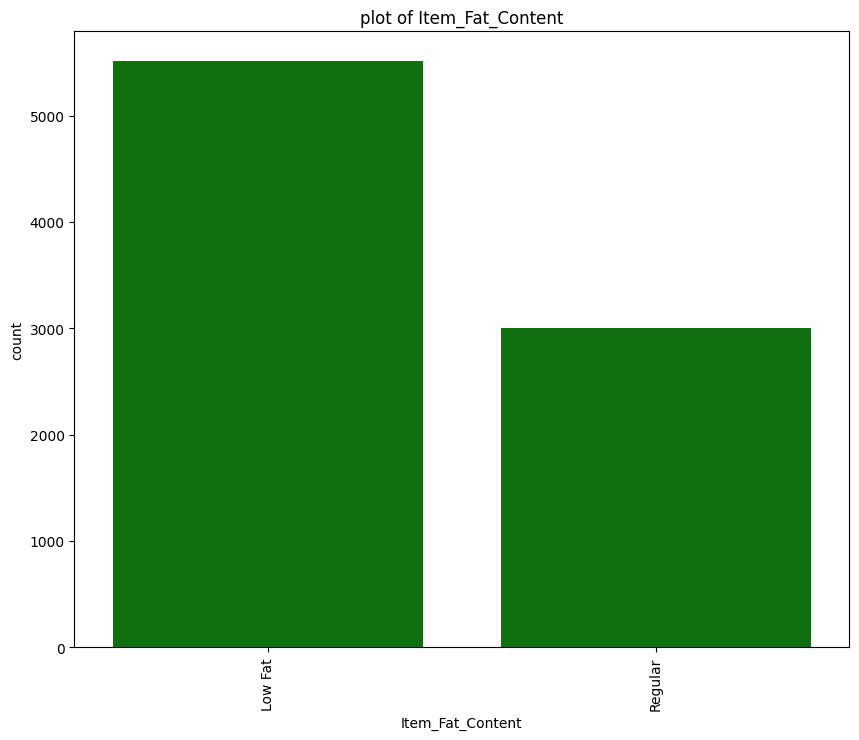

In [224]:
fig, ax = count_plt(df_sales,'Item_Fat_Content')


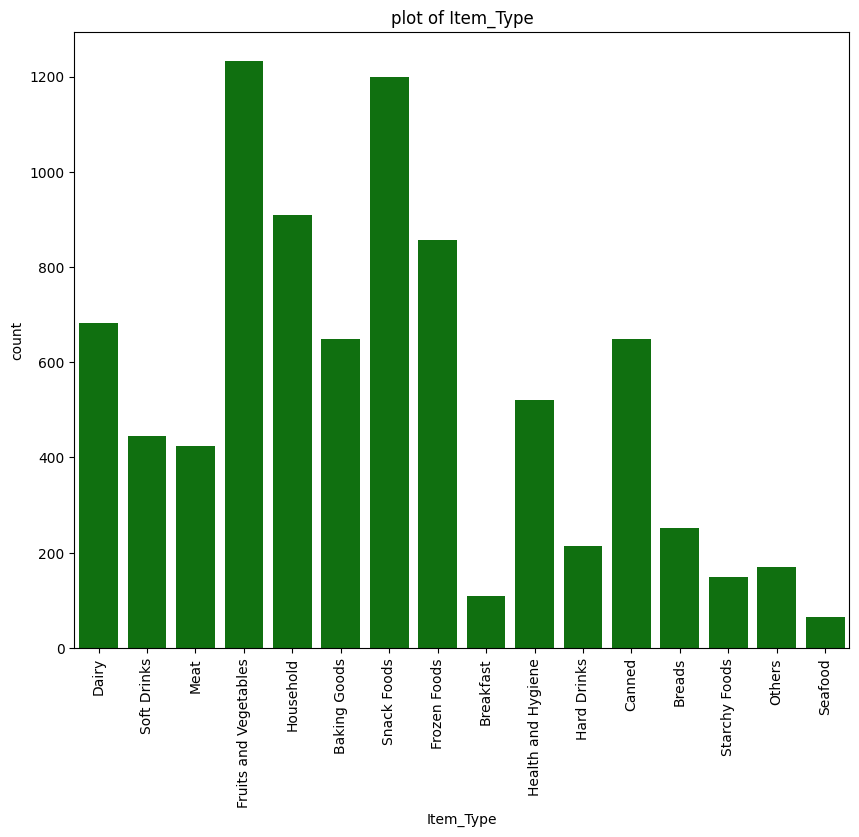

In [225]:
fig, ax = count_plt(df_sales,'Item_Type')

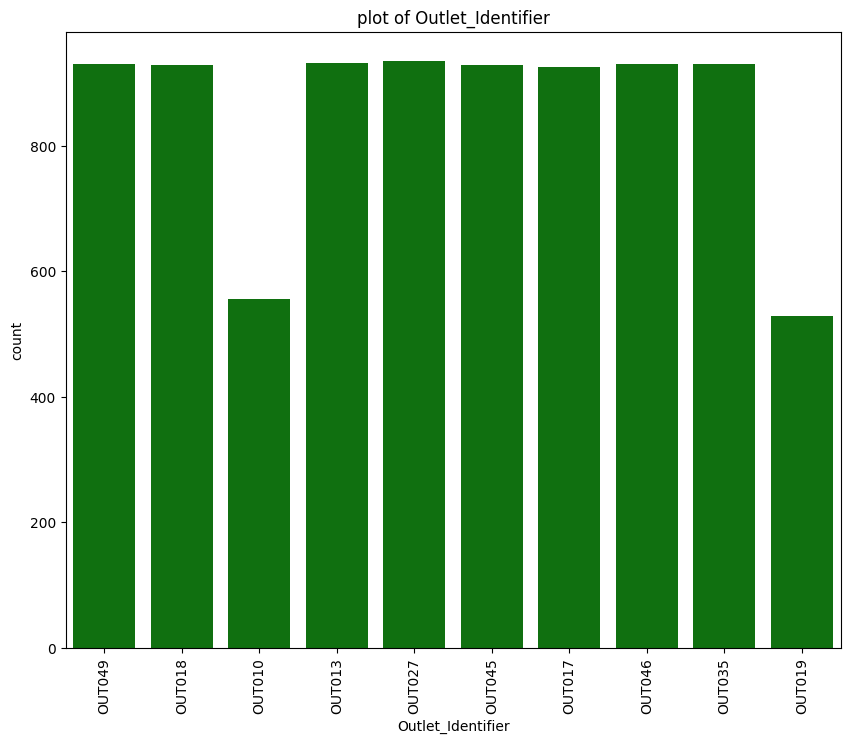

In [226]:
fig, ax = count_plt(df_sales,'Outlet_Identifier')

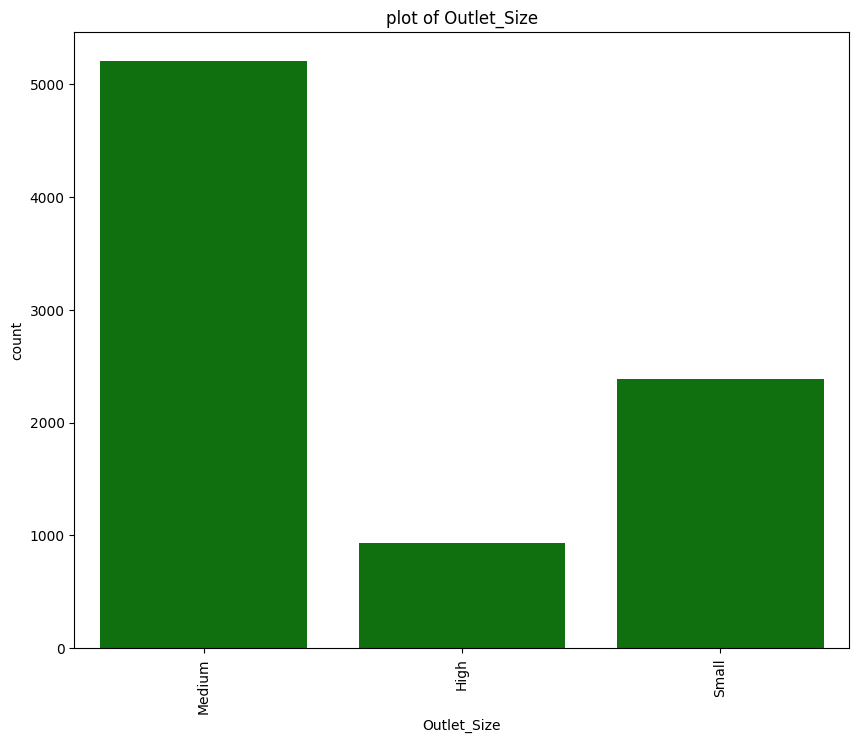

In [227]:
fig, ax = count_plt(df_sales,'Outlet_Size')

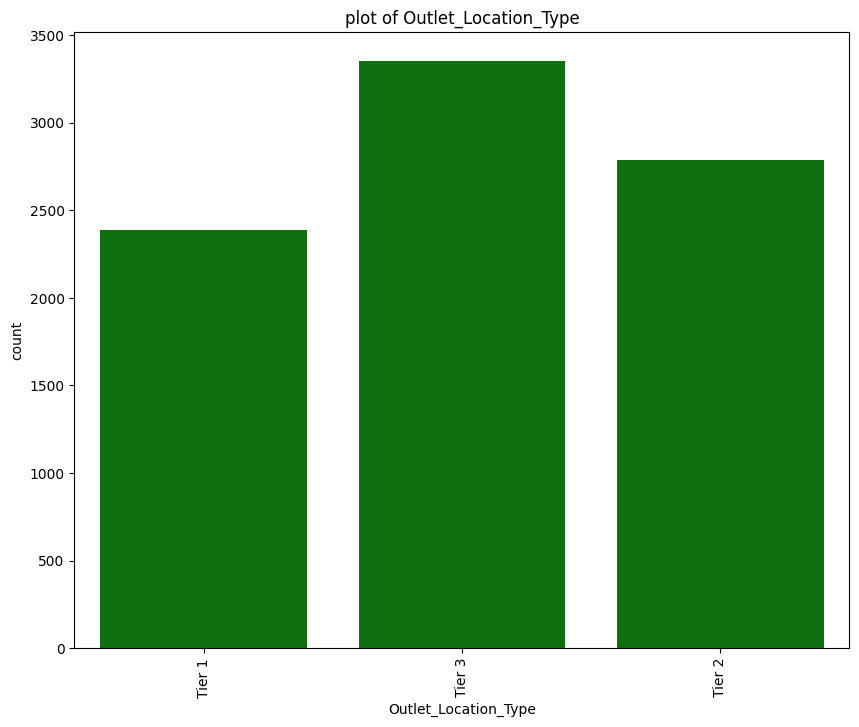

In [228]:
fig, ax = count_plt(df_sales,'Outlet_Location_Type')

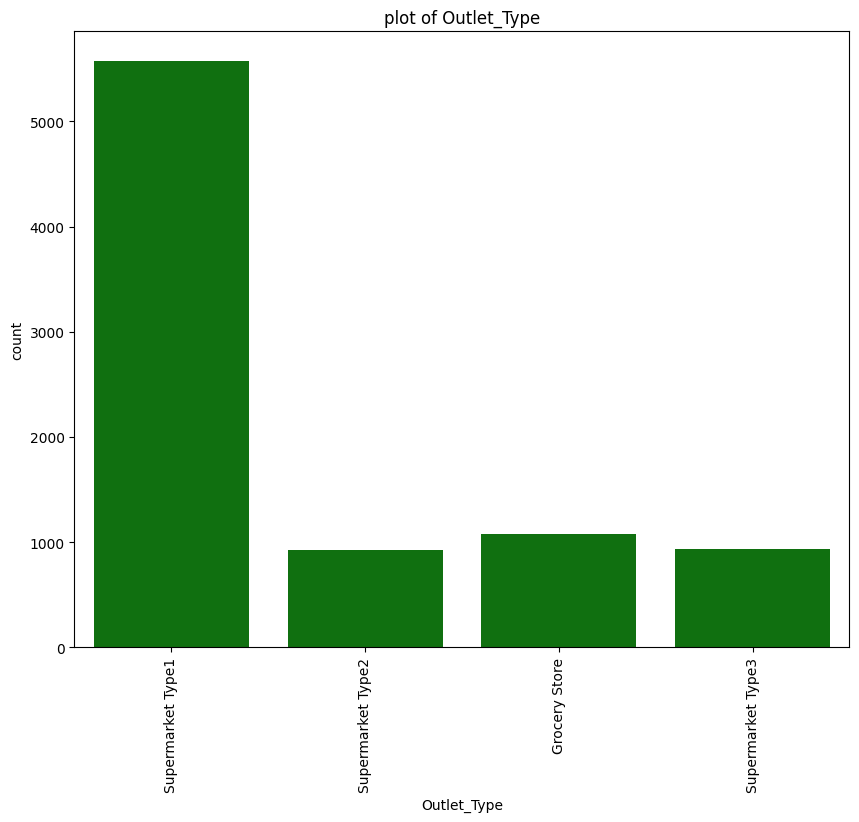

In [229]:
fig, ax = count_plt(df_sales,'Outlet_Type')

In [230]:
str_cols = df_sales.select_dtypes('object')
str_cols = str_cols.drop(columns=['Item_Identifier'])

In [231]:
corr=df_sales.corr(numeric_only = True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


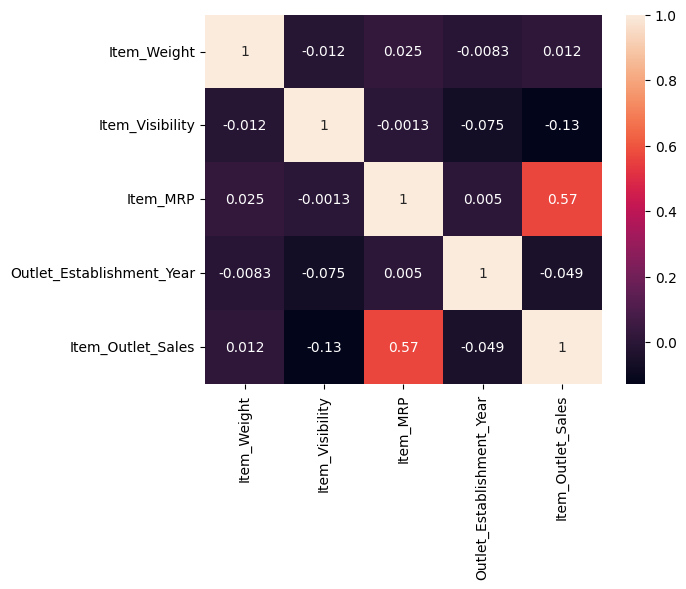

In [232]:
ax=sns.heatmap(corr,annot=True)

## Feature Inspection 🛠️👀

We will remove the placeholders we added in cleaning section

- Item_Weight

- Outlet_Size





In [233]:
df_sales['Item_Weight']= df_sales['Item_Weight'].replace(weight_mean,np.nan)
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [234]:
df_sales.loc[original_outlet_size, 'Outlet_Size']= np.nan
df_sales.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


### Univariate visualization functions

In [235]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [236]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
   # First find value counts of feature
  val_counts = df_sales[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df_sales) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")


## Item_Weight feature

Description: Weight of product


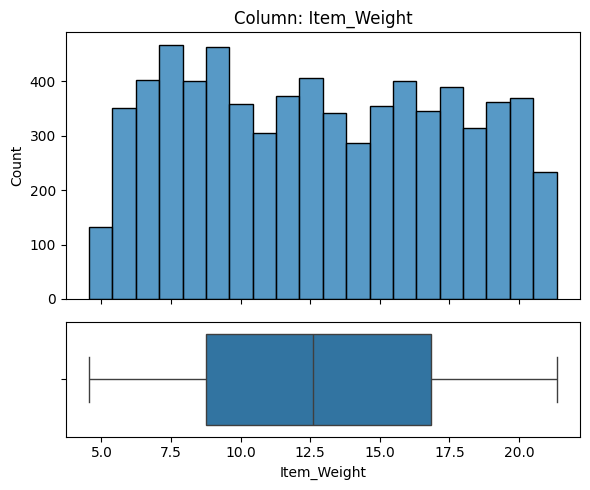

- NaN's Found: 1463 (17.17%)
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [237]:
explore_numeric(df_sales,x="Item_Weight")


- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     ` numeric`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     ` 1463 `  ,` 17.17 % ` ,`we will impute it with the mean value when we want to prepare the data for ML model`
- ### Is the feature constant or quasi-constant?
     `  Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is not relevant because it is numeric feature`
- ### Would we know this feature before the target is determined?
     `yes`

- ### Is there a business case/understanding reason to exclude based on our business case?
   `no`


## Item_Visibility

Description: 	The percentage of total display area of all products in a store allocated to the particular product

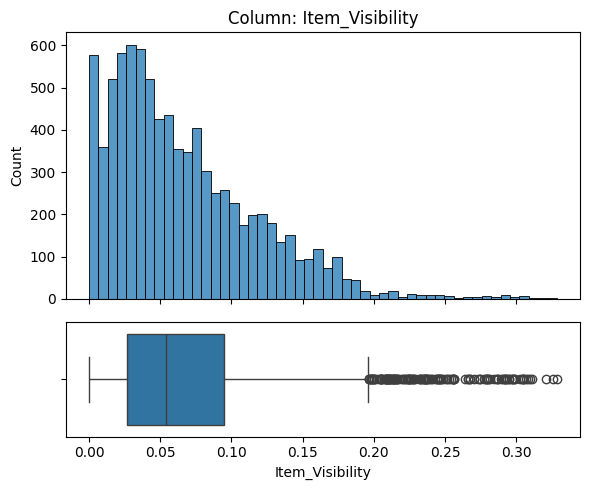

- NaN's Found: 0 (0.0%)
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [238]:
explore_numeric(df_sales,x="Item_Visibility")

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     ` numeric`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     ` 0`  ,` 0.0 % ` ,`ther's no null value `
- ### Is the feature constant or quasi-constant?
     `  Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is not relevant because it is numeric feature`
- ### Would we know this feature before the target is determined?
     `yes`

- ### Is there a business case/understanding reason to exclude based on our business case?
   `no`

## Item_MR

Description: Maximum Retail Price (list price) of the product

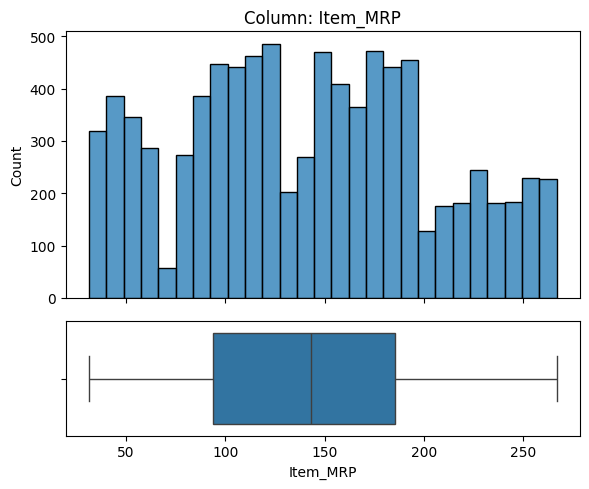

- NaN's Found: 0 (0.0%)
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [239]:
explore_numeric(df_sales,x="Item_MRP")

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     ` numeric`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     ` 0`  ,` 0.0 % ` ,`ther's no null value `
- ### Is the feature constant or quasi-constant?
     `  Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is not relevant because it is numeric feature`
- ### Would we know this feature before the target is determined?
     `yes`

- ### Is there a business case/understanding reason to exclude based on our business case?
   `no`

##Outlet_Establishment_Year

Description: The year in which store was established

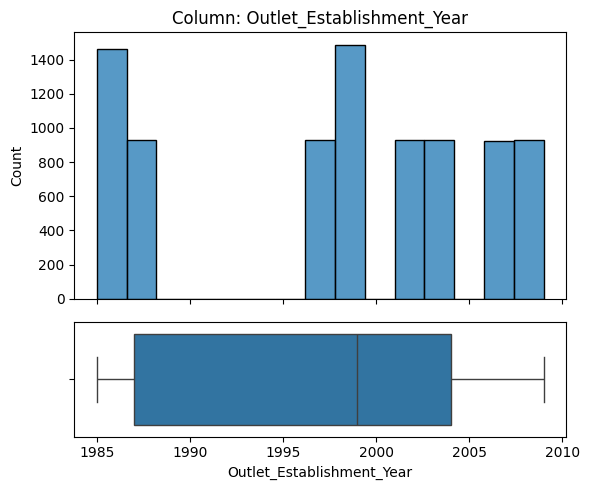

- NaN's Found: 0 (0.0%)
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [240]:
explore_numeric(df_sales,x="Outlet_Establishment_Year")

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     ` numeric`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     ` 0`  ,` 0.0 % ` ,`ther's no null value `
- ### Is the feature constant or quasi-constant?
     `  Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is not relevant because it is numeric feature`
- ### Would we know this feature before the target is determined?
     `yes`

- ### Is there a business case/understanding reason to exclude based on our business case?
   `no`

##  Item_Fat_Content feature
Description: Whether the product is low-fat or regular


<ipython-input-235-aaeea6890fbb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


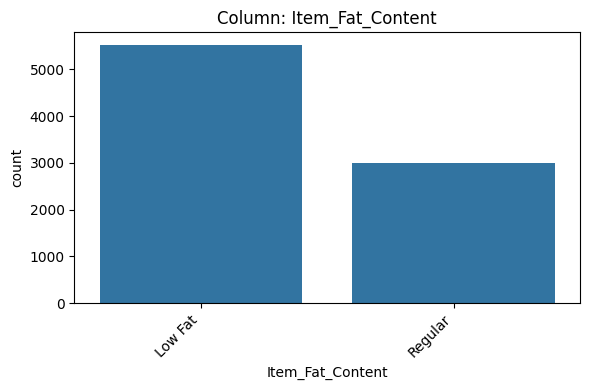

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [241]:
explore_categorical(df_sales, x= 'Item_Fat_Content');

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     `Categorical`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     `There is no null values`
- ### Is the feature constant or quasi-constant?
     `Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is a low Categorical, only two `
- ### Would we know this feature before the target is determined?
     `Yes`
- ### Is there a business case/understanding reason to exclude based on our business case?
   `No`

##  Item_Type feature
Description: The category to which the product belongs

<ipython-input-235-aaeea6890fbb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


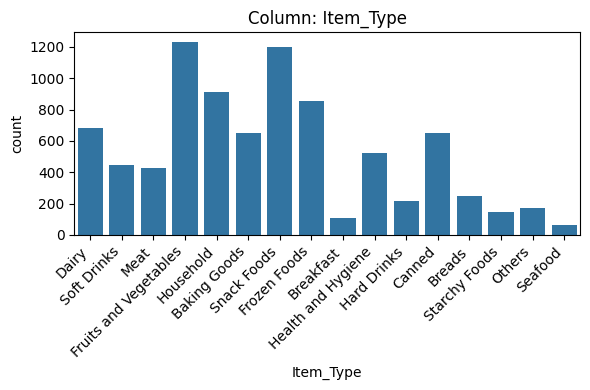

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [242]:
explore_categorical(df_sales, x= 'Item_Type');

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     `Categorical`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     `There is no null values`
- ### Is the feature constant or quasi-constant?
     `Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is a high Categorical, 16 unique values `
- ### Would we know this feature before the target is determined?
     `Yes`
- ### Is there a business case/understanding reason to exclude based on our business case?
   `No`

## Outlet_Identifier feature
Description: Store ID

<ipython-input-235-aaeea6890fbb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


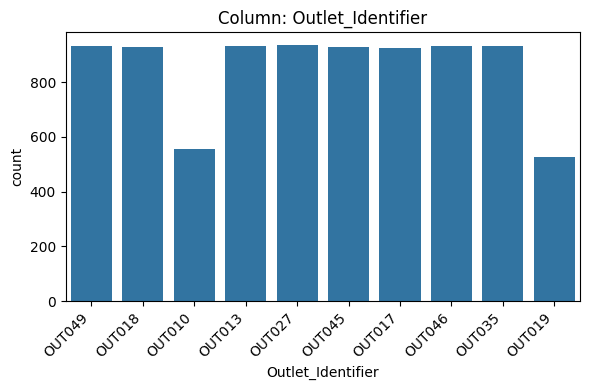

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [243]:
explore_categorical(df_sales, x= 'Outlet_Identifier');

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     `Categorical`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     `There is no null values`
- ### Is the feature constant or quasi-constant?
     `Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is a low Categorical, 10 unique values `
- ### Would we know this feature before the target is determined?
     `Yes`
- ### Is there a business case/understanding reason to exclude based on our business case?
   `No`

## Outlet_Size feature
Description: The size of the store in terms of ground area covered

<ipython-input-235-aaeea6890fbb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


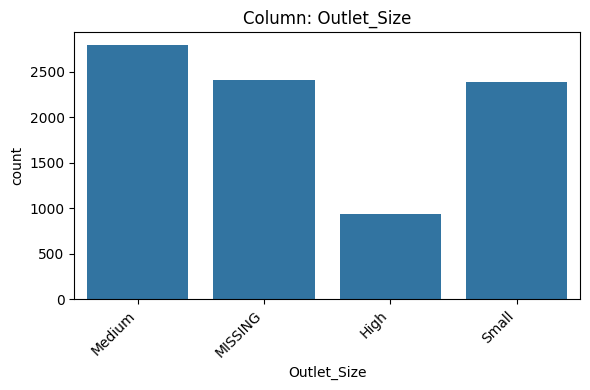

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [244]:
explore_categorical(df_sales, x= 'Outlet_Size');

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     `Categorical`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     `2,410`, `28.28%`, `We will impute it with the 'missing'`
- ### Is the feature constant or quasi-constant?
     `Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is a low Categorical, 4 unique values`
- ### Would we know this feature before the target is determined?
     `Yes`
- ### Is there a business case/understanding reason to exclude based on our business case?
   `No`

## Outlet_Location_Type feature
Description: The type of area in which the store is located

<ipython-input-235-aaeea6890fbb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


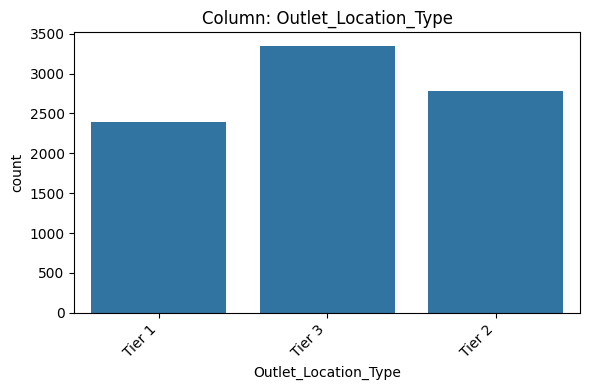

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [245]:
explore_categorical(df_sales, x= 'Outlet_Location_Type');

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     `Categorical`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     `There is no null values`
- ### Is the feature constant or quasi-constant?
     `Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is a low Categorical, 3 unique values`
- ### Would we know this feature before the target is determined?
     `Yes`
- ### Is there a business case/understanding reason to exclude based on our business case?
   `No`

## Outlet_Type feature
Description: Whether the outlet is a grocery store or some sort of supermarket

<ipython-input-235-aaeea6890fbb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


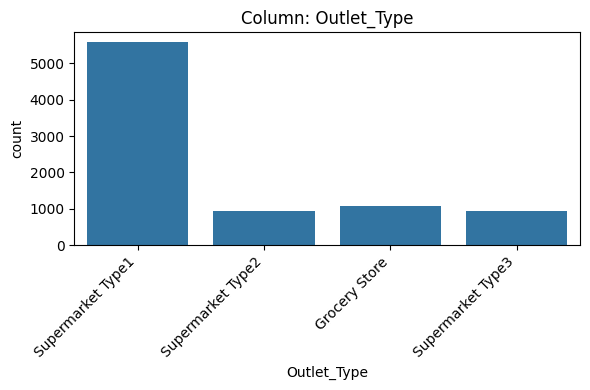

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [246]:
explore_categorical(df_sales, x= 'Outlet_Type');

- ### What type of feature is it? (Categorical (nominal), ordinal, numeric)
     `Categorical`
- ###  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     `There is no null values`
- ### Is the feature constant or quasi-constant?
     `Not constant or quasi-constant  `
- ### What is the cardinality? Is it high (>10)?
   `It is a low Categorical, 4 unique values`
- ### Would we know this feature before the target is determined?
     `Yes`
- ### Is there a business case/understanding reason to exclude based on our business case?
   `No`

 ### multivariate visualization functions

In [247]:
# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder);

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize);

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None);

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0);
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax;

In [248]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax;

 ------


 ## Item_Weight vs. Item_Outlet_Sales








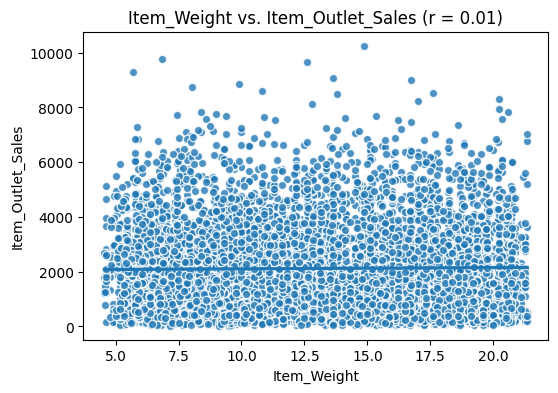

In [249]:
plot_numeric_vs_target(df_sales,x= 'Item_Weight');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
  `r has  a low value , so  it dosn't has strong correlation with the target.`
- ### Does this feature appear to be a predictor of the target?
  `it is not a good predictor of the target. `


## Item_Visibility vs. Item_Outlet_Sales

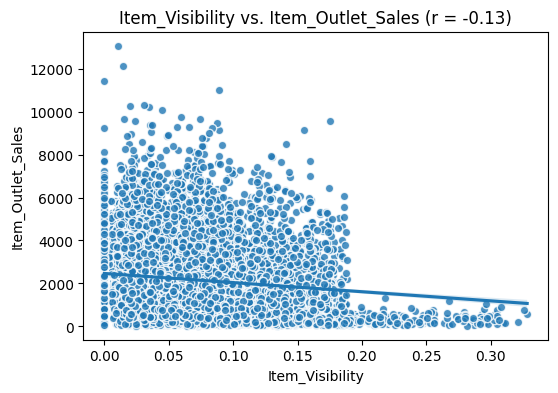

In [250]:
plot_numeric_vs_target(df_sales,x= 'Item_Visibility');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
  `r has  a low value , so  it dosn't has strong correlation with the target.`
- ### Does this feature appear to be a predictor of the target?
  `it is not a good predictor of the target. `


## Item_MRP vs. Item_Outlet_Sales

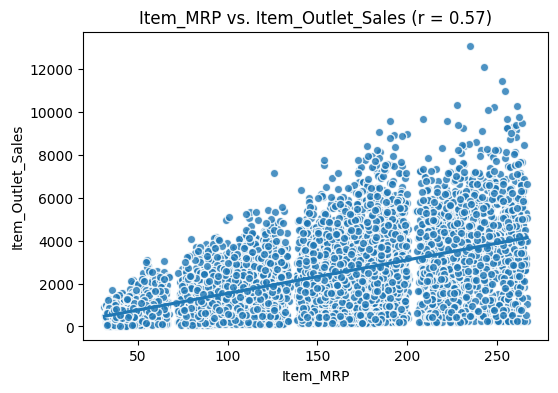

In [251]:
plot_numeric_vs_target(df_sales,x= 'Item_MRP');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
  `r  is moderate value , so  it  has moderate correlation with the target.`
- ### Does this feature appear to be a predictor of the target?
  `it's a good predictor of the target. `


##Outlet_Establishment_Year   vs. Item_Outlet_Sales

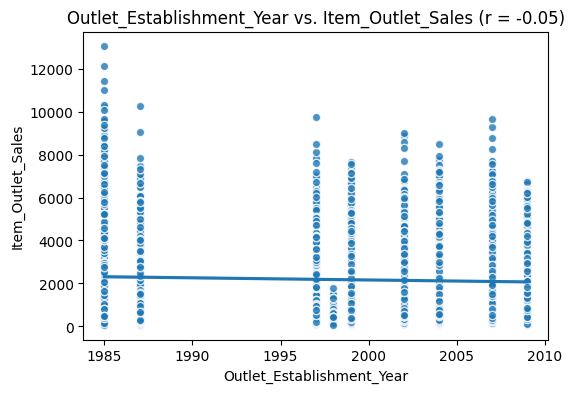

In [252]:
plot_numeric_vs_target(df_sales,x= 'Outlet_Establishment_Year');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
  `r has  a low value , so  it dosn't has strong correlation with the target.`
- ### Does this feature appear to be a predictor of the target?
  `it is not a good predictor of the target. `


##Item_Fat_Content   vs. Item_Outlet_Sales

<ipython-input-247-34cb50c3b5ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


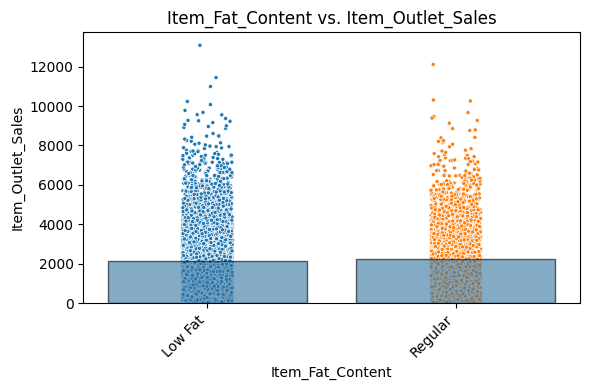

In [253]:
plot_categorical_vs_target(df_sales,x= 'Item_Fat_Content');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
 ` based on business understanding, one might expect that it effect the target`
- ### Does this feature appear to be a predictor of the target?
  `does not seem to have predictor of Item Outlet Sales. `

##Item_Type  vs. Item_Outlet_Sales




<ipython-input-247-34cb50c3b5ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


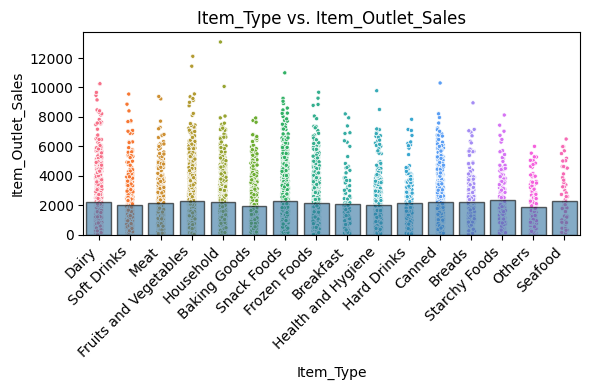

In [254]:
plot_categorical_vs_target(df_sales,x= 'Item_Type');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
 ` based on business understanding, one might expect that it effect the target`
- ### Does this feature appear to be a predictor of the target?
  `it's seems to have predictor of Item Outlet Sales. `

## Outlet_Identifier vs. Item_Outlet_Sales




<ipython-input-247-34cb50c3b5ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


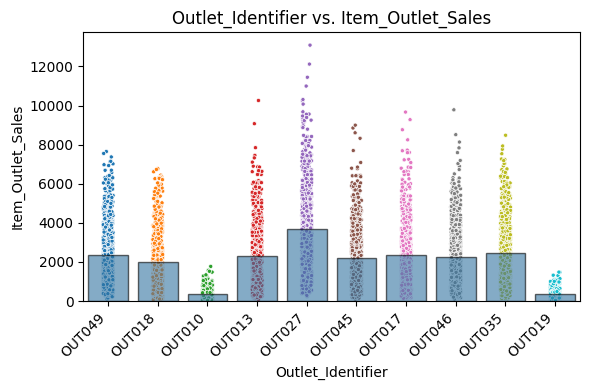

In [256]:
plot_categorical_vs_target(df_sales,x= 'Outlet_Identifier');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
 ` based on business understanding, one might expect that it effect the target`
- ### Does this feature appear to be a predictor of the target?
  `it's seems to have predictor of Item Outlet Sales. `

## Outlet_Size vs. Item_Outlet_Sales




<ipython-input-247-34cb50c3b5ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


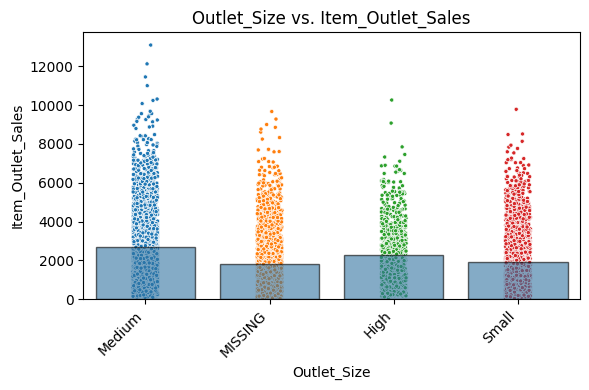

In [257]:
plot_categorical_vs_target(df_sales,x= 'Outlet_Size');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
 ` based on business understanding, one might expect that it effect the target`
- ### Does this feature appear to be a predictor of the target?
  `it's seems to have some predictor of Item Outlet Sales. `

## Outlet_Location_Type vs. Item_Outlet_Sales




<ipython-input-247-34cb50c3b5ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


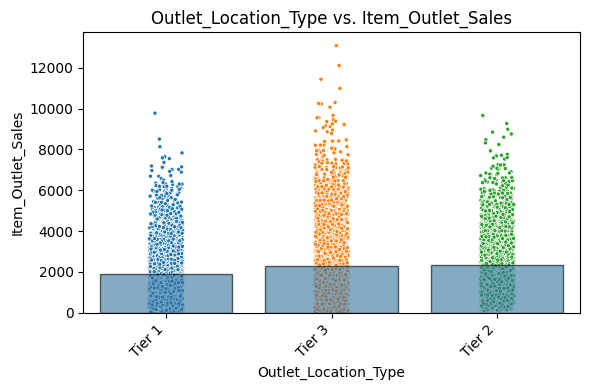

In [258]:
plot_categorical_vs_target(df_sales,x= 'Outlet_Location_Type');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
 ` based on business understanding, one might expect that it effect the target`
- ### Does this feature appear to be a predictor of the target?
  `it's seems to have some predictor of Item Outlet Sales. `

## Outlet_Type vs. Item_Outlet_Sales




<ipython-input-247-34cb50c3b5ce>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


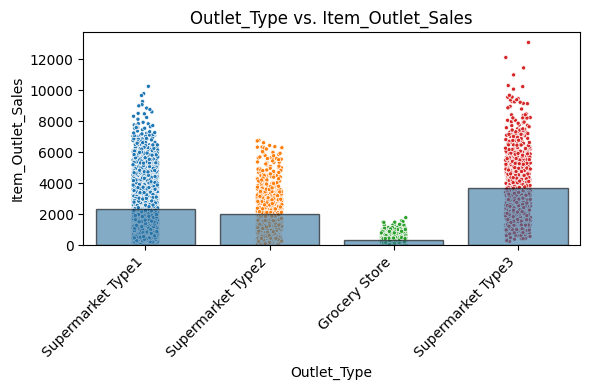

In [259]:
plot_categorical_vs_target(df_sales,x= 'Outlet_Type');

- ### Based on your business understanding, would you expect this feature to be a predictor of the target?
 ` based on business understanding, one might expect that it effect the target`
- ### Does this feature appear to be a predictor of the target?
  `it's seems to have some predictor of Item Outlet Sales. `